In [1]:
import pandas as pd 
import sys
import numpy as np 
import scipy as sp
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import tree

import seaborn as sns
pd.set_option('display.width', 1500)
pd.set_option('display.max_columns', 100)

sns.set_context('poster')
sns.set(style="ticks")

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
import statsmodels.api as sm
from statsmodels.tools import add_constant
from statsmodels.regression.linear_model import RegressionResults
from sklearn.decomposition import PCA
from sklearn import ensemble 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from graphviz import Source
from sklearn.tree import export_graphviz
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_iris

In [2]:
"""
fit_and_plot_dt

Fit decision tree with on given data set with given depth, and plot the data/model
Input: 
    fname (string containing file name)
    depth (depth of tree)
"""
def fit_and_plot_dt(x, y ,depth, title, ax, plot_data=True, fill=True, color='Blues'):
    dt = tree.DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(x,y)
    
    ax = plot_tree_boundary(x, y, dt, title, ax, plot_data, fill, color)
    return ax

"""
plot_tree_boundary

A funtion that visualizes the data and the decison boundaries 
Input:
    x - predictors 
    y - target
    model - the classifier you want to visualize 
    title - title for plot 
    ax - a set of axes to plot on 
Return:
    ax - with data and decision boundaries 
"""

def plot_tree_boundary(x, y, model, title, ax, plot_data=True, fill=True, color='Greens'):
    if plot_data:
        ax.scatter(x[y==1,0], x[y==1,1], c='green')
        ax.scatter(x[y==0,0], x[y==0,1], c='grey')
 
    # Create Mesh    
    interval = np.arange(min(x.min(), y.min()), max(x.max(), y.max()), 0.01)
    n = np.size(interval)
    x1, x2 = np.meshgrid(interval, interval)
    x1 = x1.reshape(-1,1)
    x2 = x2.reshape(-1,1)
    xx = np.concatenate((x1,x2), axis=1)
    
    yy = model.predict(xx)
    yy = yy.reshape((n,n))
    
    x1 = x1.reshape(n,n)
    x2 = x2.reshape(n,n)
    if fill:
        ax.contourf(x1, x2, yy, alpha=0.1, cmap=color)
    else:
        ax.contour(x1, x2, yy, alpha=0.1, cmap=color)
    
    ax.set_title(title)
    ax.set_xlabel('Latitude')
    ax.set_ylabel('Longitude')
    
    return ax 

In [3]:
data = np.loadtxt('data_decision_trees.txt', delimiter=',')
X, y = data[:, :-1], data[:, -1]

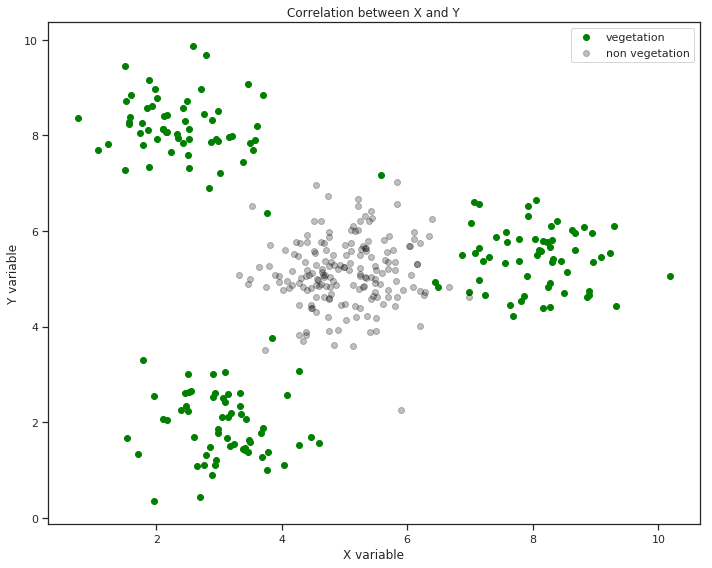

In [5]:
fig, ax = plt.subplots(1,1, figsize=(10,8))
ax.scatter(X[y==1, 0], X[y==1, 1], c='green', label='vegetation')
ax.scatter(X[y==0, 0], X[y==0, 1], c='black', label='non vegetation', alpha=0.25)
ax.set_xlabel('X variable')
ax.set_ylabel('Y variable')
ax.set_title('Correlation between X and Y')
ax.legend()
plt.tight_layout()
plt.show()

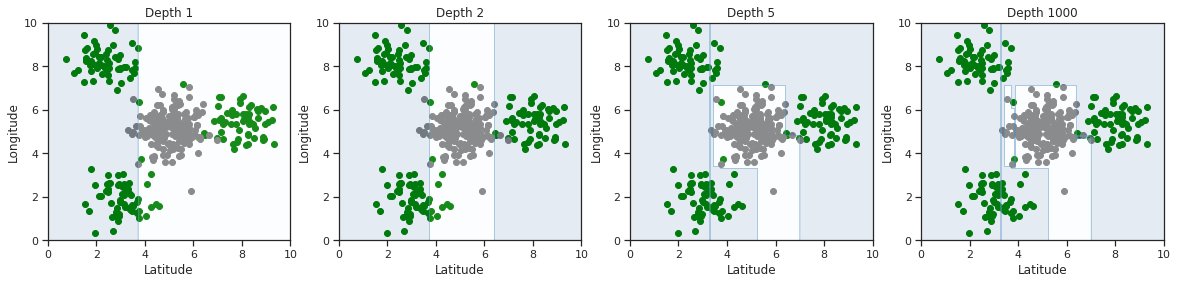

In [7]:
depths = [1, 2, 5, 1000]
fig, ax = plt.subplots(1, len(depths), figsize=(20,4))
ind = 0
for i in depths:
    ax[ind] = fit_and_plot_dt(X,y,i,'Depth {}'.format(i), ax[ind])
    ax[ind].set_xlim(0,10)
    ax[ind].set_ylim(0,10)
    ind += 1

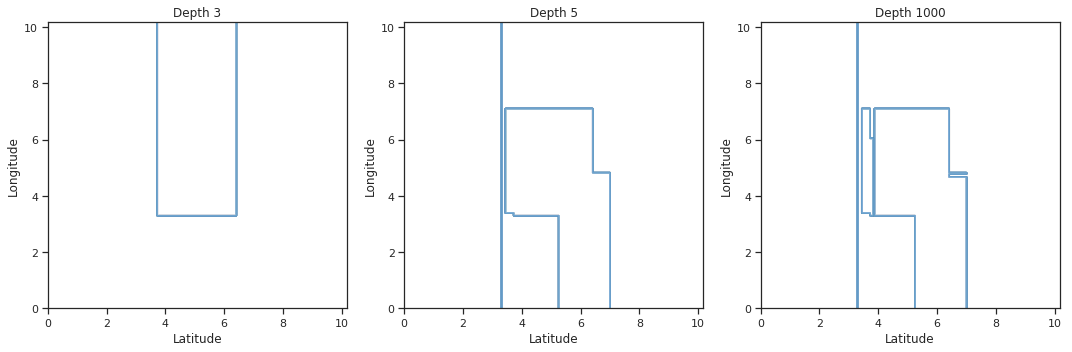

In [8]:
# Variance comparison between simple and complex models 
depths = [3,5,1000]
fig, ax = plt.subplots(1, len(depths), figsize=(15,5))
for d in range(len(depths)):
    for i in range(10):
        ax[d] = fit_and_plot_dt(X,y,depths[d], 'Depth {}'.format(depths[d]), ax[d], plot_data=False, fill=False)
        # ax[d].set_xlim(0,10)
        # ax[d].set_ylim(0,10)
plt.tight_layout()
plt.show()

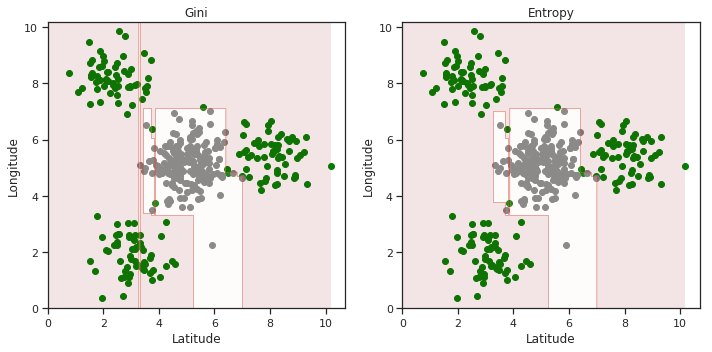

In [9]:
# Difference Splitting Criteria 
depth = 10
fig, ax = plt.subplots(1,2,figsize=(10,5))
dt = tree.DecisionTreeClassifier(max_depth=depth)
dt.fit(X,y)
ax[0] = plot_tree_boundary(X,y,dt,'Gini',ax[0],color='Reds')

dt = tree.DecisionTreeClassifier(max_depth=depth, criterion='entropy')
dt.fit(X,y)
ax[1] = plot_tree_boundary(X,y,dt,'Entropy',ax[1],color='Reds')
plt.tight_layout()
plt.show()

/home/tungutokyo/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


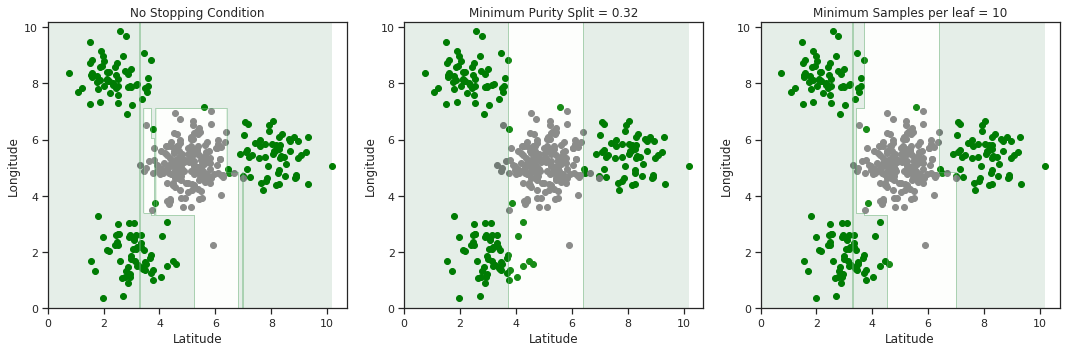

In [10]:
# Difference Stopping Conditions 
fig, ax = plt.subplots(1,3, figsize=(15,5))
dt = tree.DecisionTreeClassifier()
dt.fit(X,y)
ax[0] = plot_tree_boundary(X,y,dt,'No Stopping Condition',ax[0])

dt = tree.DecisionTreeClassifier(min_impurity_split=0.32)
dt.fit(X,y)
ax[1] = plot_tree_boundary(X,y,dt,'Minimum Purity Split = 0.32',ax[1])

dt = tree.DecisionTreeClassifier(min_samples_leaf=2)
dt.fit(X,y)
ax[2] = plot_tree_boundary(X,y,dt,'Minimum Samples per leaf = 10', ax[2])

plt.tight_layout()
plt.show()

Reference:
- https://harvard-iacs.github.io/2018-CS109A/lectures/lecture-15/demo/
- https://github.com/Harvard-IACS/2018-CS109A/tree/master/content/lectures/lecture15/presentation      
- https://github.com/PacktPublishing/Artificial-Intelligence-with-Python/blob/master/Chapter%200/code/decision_trees.py
- https://github.com/ageron/handson-ml2/blob/master/06_decision_trees.ipynb 